# Importing and Data Loading


In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage



In [3]:
matrix = sio.loadmat('data2.mat')
matrix

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [4]:
X = matrix['X']

# Visualize Data

In [5]:
X = np.transpose(X)

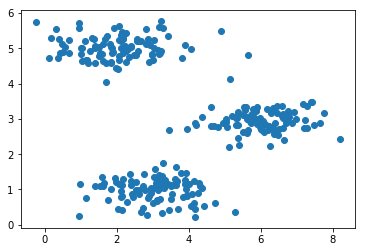

In [6]:
plt.scatter(X[0], X[1])

### Initialize Random Clusters

In [7]:
K = 3

In [8]:
def rndCent(X, K):
    init_cent = []
    for i in range(K):
        j = np.random.randint(1, len(X))
        init_cent.append(X[j])
    return init_cent    

In [9]:
init_cent = rndCent(np.transpose(X), 3)
init_cent

[array([3.30063655, 1.28107588]),
 array([2.71730799, 0.48697555]),
 array([3.02836363, 1.35635189])]

### Functions

In [10]:

def closest_centroid(X, init_cent):
    X = np.transpose(X)
    m = len(X)
    K = len(init_cent)
    idx = np.zeros(m)
    
    for i in range(m):
        test = np.ones((K,len(init_cent[0])))*X[i]
        vec = np.sqrt(np.sum(np.power((test - init_cent), 2), axis=1))
        cent = np.argmin(vec)
        idx[i] = cent
        
    return idx    

In [11]:
def mean(X, idx, K):
    mean = np.zeros((K, len(X)))
    for i in range(K):
        set = np.multiply(np.reshape(np.asarray(idx == i, dtype=int), (len(X[1]),1)) , np.transpose(X))
        mean[i]= np.sum(set, axis=0)/(set!=0).sum(0)
    return mean    

In [17]:
def run_Kmeans(X, init_cent, iters, plot=0):
    centroids = init_cent
    K = len(init_cent)
    
   
    for i in range(iters):
        print(f"Iteration {i} >>>")
        if (plot != 0):
            plt.scatter(X[0], X[1])
            temp = np.transpose(centroids)
            plt.scatter(temp[0], temp[1], marker="X", s=100)
            plt.show()
            time.sleep(1)
            clear_output()
        idx = closest_centroid(X, centroids)
        centroids = mean(X, idx, K)
        
    return centroids    
        

## Running K-Means

In [13]:
history = run_Kmeans(X, init_cent, 10)

In [14]:
history

array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]])

# IMAGE COMPRESSION

In [20]:
def compressImage(image, clusters):
    img=mpimg.imread(image)
    img = skimage.img_as_float(img)
    x=img.shape[0]
    y=img.shape[1]
    bit=img.shape[2]
    imX = np.reshape(img, (x*y, bit))
    init_cent = rndCent(imX, clusters)
    centroids = run_Kmeans(np.transpose(imX), init_cent, 5)
    idx = closest_centroid(np.transpose(imX), centroids)
    idx = idx.astype("int32")
    Xrec=centroids[idx][:]
    Xrec = np.reshape(Xrec,(x,y,3))
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img)
    f.add_subplot(1,2, 2)
    plt.imshow(Xrec)
    plt.show(block=True)
    return Xrec

Iteration 0 >>>
Iteration 1 >>>
Iteration 2 >>>
Iteration 3 >>>
Iteration 4 >>>


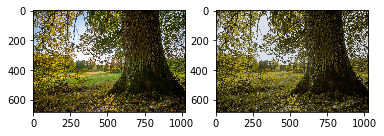

In [23]:
compressedImage = compressImage("scene.jpg", 16)


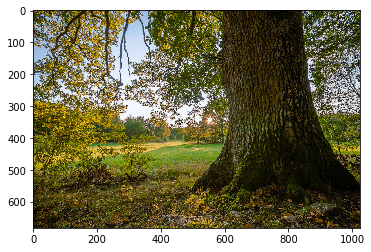

In [26]:
img=mpimg.imread("scene.jpg")
img = skimage.img_as_float(img)
plt.imshow(img)

In [30]:
import scipy.misc
scipy.misc.imsave('outfile.jpg', compressedImage)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
